# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file= "valid.p"
testing_file = "test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = train['features'].shape[0]

# TODO: Number of validation examples
n_validation = valid['features'].shape[0]

# TODO: Number of testing examples.
n_test = test['features'].shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = train['features'][1].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(train['labels']) + 1

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

<Container object of 43 artists>

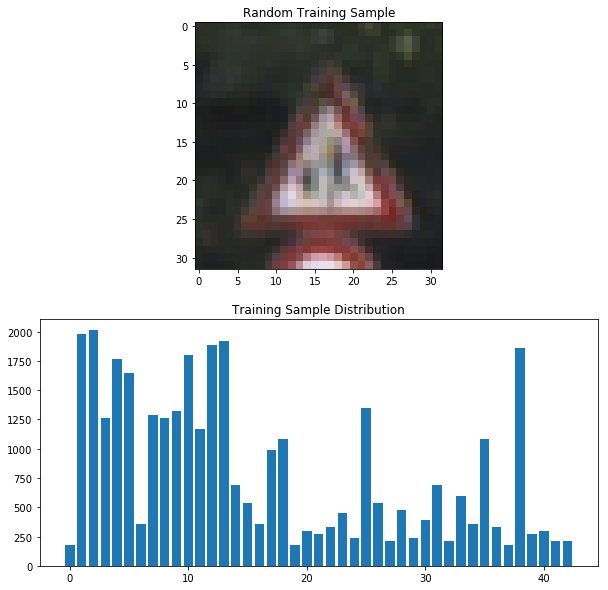

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

img_index = random.randint(0, train['features'].shape[0])
image = train['features'][img_index]

label_list = [0]*43

for label in train['labels']:
    label_list[label] = label_list[label] + 1


fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(2,1,1)
a.set_title("Random Training Sample")
plt.imshow(image)

a = fig.add_subplot(2,1,2)
a.set_title("Training Sample Distribution")
plt.bar(range(43), label_list, align = 'center')



### Data Issues

In the above diagram, we can see that the data is not very evenly distributed.  In order to deal with this issue, we will augment the data and try to create a larger more evenly distributed dataset.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### Here we have som data augmentation techniques

Instead of performing data augmentation on the fly, we will perform this step once and create a new dataset which we will save into a pickle dictionary.  This way comparisons can be made between training on the augmented dataset vs. the original dataset.

In [7]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

#GENERATE AUGMENTED DATA
#This step has already been run and the augmented data is saved in "augmented_data.p"

#WARNING: THIS CELL TAKES A LONG TIME TO RUN - ONLY RUN IF YOU WANT TO GENERATE A NEW BATCH OF AUGMENTED DATA!!!

import cv2

def random_translation(image):
    #Randomly shifts an image 
    x = image.shape[0]
    y = image.shape[1]
    
    shift_max_x = x*0.2
    shift_max_y = y*0.2

    x_shift = np.random.uniform(-shift_max_x, shift_max_x)
    y_shift = np.random.uniform(-shift_max_y, shift_max_y)

    shift_matrix = np.float32([[1, 0, x_shift], [0, 1, y_shift]])
    shifted_image = cv2.warpAffine(image, shift_matrix, (x, y))

    return shifted_image


def random_rotation(image):
    #Rotate image a by a random angle from -90 to +90 degrees
    x = image.shape[0]
    y = image.shape[1]
    
    rotation_matrix = np.float32(cv2.getRotationMatrix2D((x/2,y/2), np.random.uniform(-90,90),1))
    rotated_image = cv2.warpAffine(image,rotation_matrix,(x,y))
    
    return rotated_image

def random_blur(image):
    #Blur an image a random amount
    random_kernel = np.random.randint(0, 2)
    kernel = 2 * random_kernel + 1
        
    blurred_image = cv2.GaussianBlur(image, (kernel, kernel), 0)
    
    return blurred_image

def random_zoom(image):
    #Zoom in to an image a random amount
    x = image.shape[0]
    y = image.shape[1]
    
    enlarge_factor = np.random.uniform(120,160)/100.0
    enlarged_image = cv2.resize(image, (int(enlarge_factor*x), int(enlarge_factor*y)))
    eX = enlarged_image.shape[0]
    eY = enlarged_image.shape[1]
    
    if enlarged_image.shape[0] % 2 == 1:
        cropped_image = enlarged_image[int(((eX-1)/2)-16):int(((eX-1)/2)+16),int(((eY-1)/2)-16):int(((eY-1)/2)+16),:]
    else:
        cropped_image = enlarged_image[int((eX/2)-16):int((eX/2)+16),int((eY/2)-16):int((eY/2)+16),:]

    return cropped_image

# Perform data augmentation.  This function will aim to augment data 
# until there is at least 3500 images for each class
def augment_dataset(dataset, labels, label_count):

    initial_image_count = dataset.shape[0]
    initial_min = min(label_count)
    batch = 1
    images_augmented = 0
    while min(label_count) < 3500:
        for index in range(initial_image_count):
            if label_count[labels[index]] < 3500:
                images_augmented += 4
                #Translation
                dataset = np.concatenate((dataset, np.expand_dims(random_translation(dataset[index]), axis=0)))
                labels = np.append(labels, labels[index])
                label_count[labels[index]] = label_count[labels[index]] + 1
                
                #Rotation
                dataset = np.concatenate((dataset, np.expand_dims(random_rotation(dataset[index]), axis=0)))
                labels = np.append(labels, labels[index])
                label_count[labels[index]] = label_count[labels[index]] + 1
                
                #Blur
                dataset = np.concatenate((dataset, np.expand_dims(random_blur(dataset[index]), axis=0)))
                labels = np.append(labels, labels[index])
                label_count[labels[index]] = label_count[labels[index]] + 1
                
                #Zoom          
                dataset = np.concatenate((dataset, np.expand_dims(random_zoom(dataset[index]), axis=0)))
                labels = np.append(labels, labels[index])
                label_count[labels[index]] = label_count[labels[index]] + 1
                
            print('Images Augmented: ', images_augmented, end='\r')
    
    return {'augmented_dataset':dataset, 'labels':labels, 'label_count':label_count}
    

augmented_data = augment_dataset(train['features'], train['labels'], label_list)

pickle.dump(augmented_data, open("augmented_data.p", "wb"))

print("Complete - Augmented Dataset saved in augmented_data.p")

KeyboardInterrupt: 

### Data Preprocessing
Here we handle all of the data preprocessing.  The user can choose to use either the original or the augmented dataset.  The user can also choose to leave the images in RGB format or convert them to grayscale.  The following block will also normalize the data between 0 and 1.

Training Set Size =  125338
Validation Set Size =  22119
Data Loaded Successfully
Image Dimensions:  (32, 32, 3)


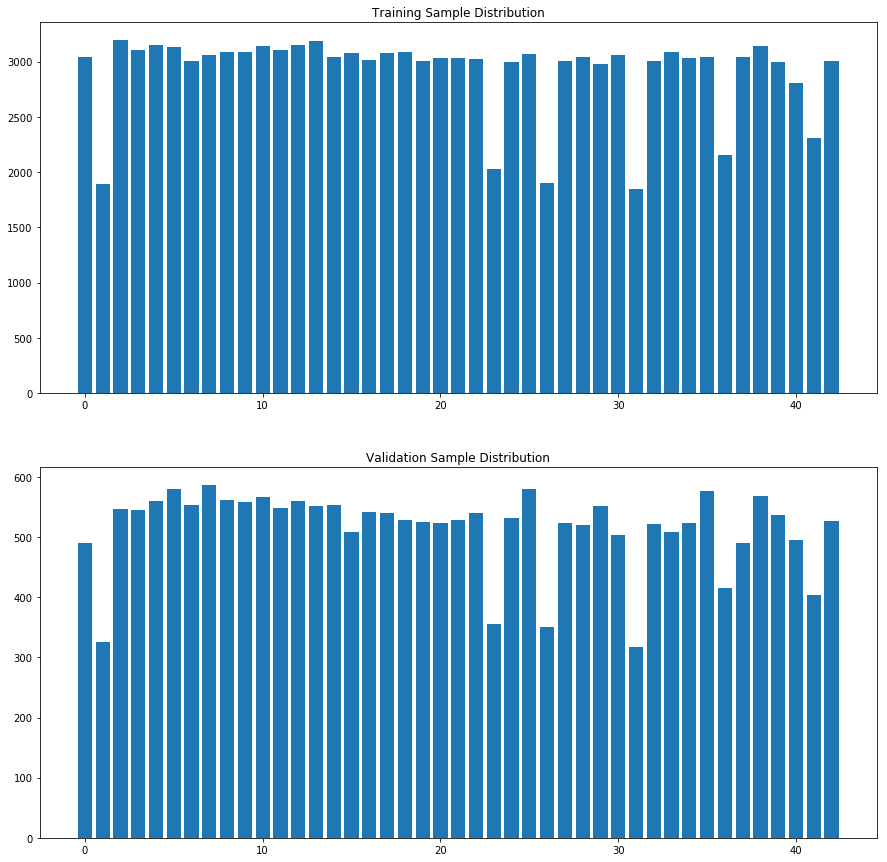

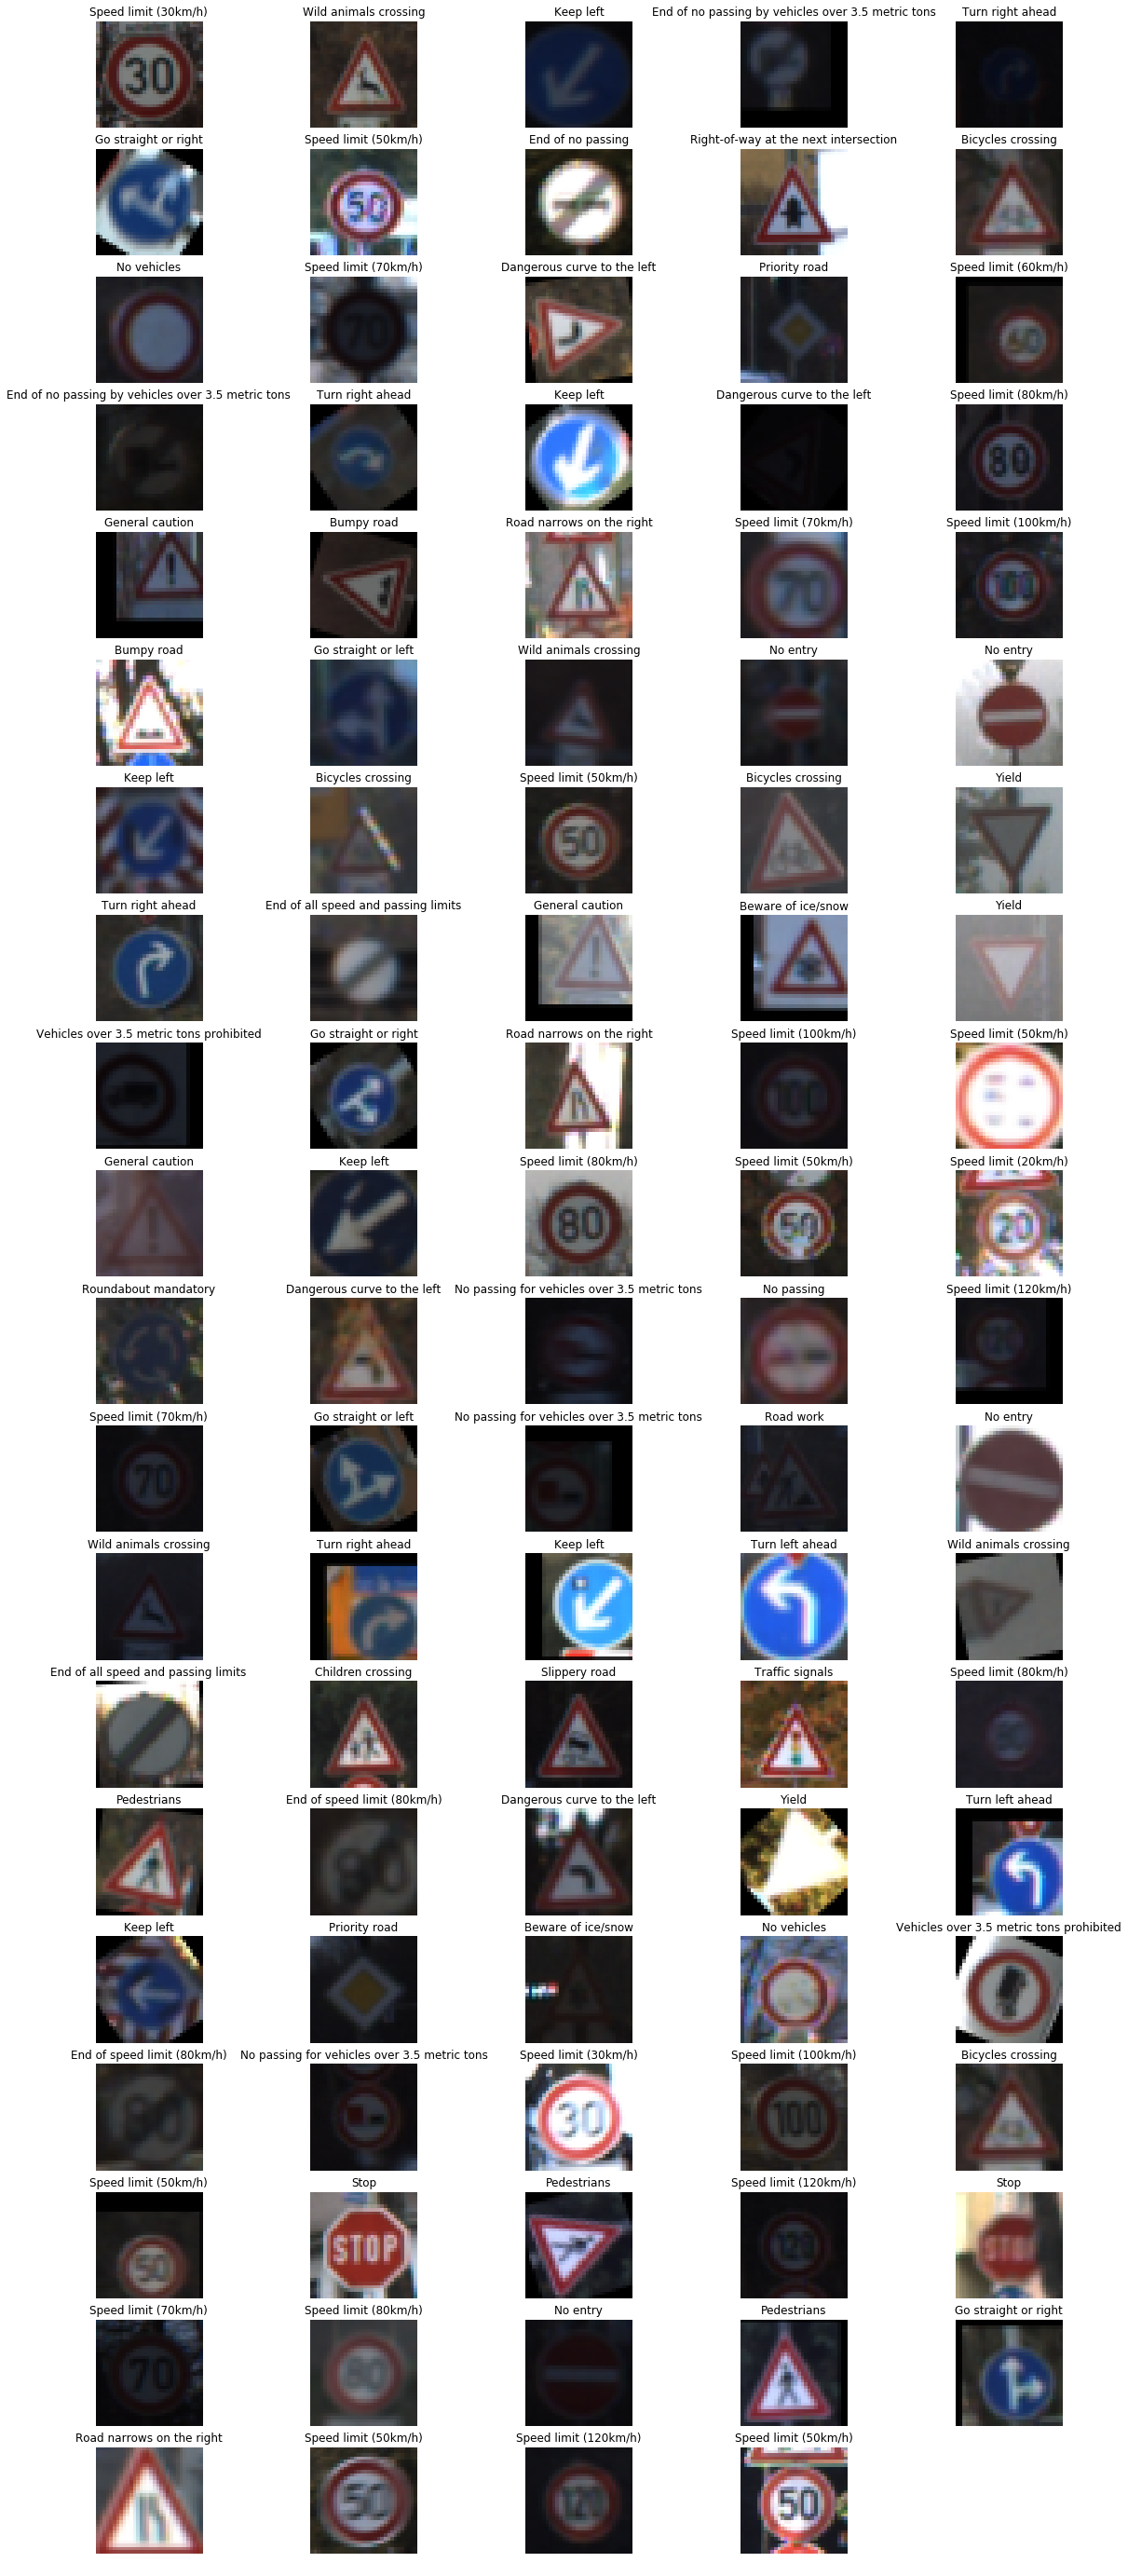

In [6]:
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import csv
import cv2

# Choose Dataset and Color Scheme
USE_AUGMENTED_DATA = True # TRUE=USE AUGMENTED DATA, FALSE=USE ORIGINAL DATA
CONVERT_TO_GRAYSCALE = False # TRUE=CONVERT TO GRAYSCALE, FALSE=KEEP DATA RGB

label_list = [0]*43

for label in train['labels']:
    label_list[label] = label_list[label] + 1

#Load Original or Augmented Data
if USE_AUGMENTED_DATA:
    augmented_data = pickle.load(open("augmented_data.p", "rb"))
    
    train_features = augmented_data['augmented_dataset']
    train_labels = augmented_data['labels']
    label_list = augmented_data['label_count']
    
    validation_features = valid['features']
    validation_labels = valid['labels']
    
    #Combine training and validation sets in order to redistribute data
    combined_features = np.concatenate((train_features, validation_features), axis=0)
    combined_labels =np.append(train_labels, validation_labels)
    
    #Redistribute data
    train_features, validation_features, train_labels, validation_labels = train_test_split(combined_features, combined_labels, test_size = 0.15, random_state=15)
    
    #Calculate data distribution
    train_list = [0]*43
    valid_list = [0]*43

    for label in train_labels:
        train_list[label] = train_list[label] + 1
    
    for label in validation_labels:
        valid_list[label] = valid_list[label] + 1
        
    print('Training Set Size = ', train_features.shape[0])
    print('Validation Set Size = ', validation_features.shape[0])
    
    #Plot Data distribution for training and validation sets
    fig1 = plt.figure(figsize = (15,15))
    
    a = fig1.add_subplot(2,1,1)
    a.set_title("Training Sample Distribution")
    plt.bar(range(43), train_list, align = 'center')
    
    a = fig1.add_subplot(2,1,2)
    a.set_title("Validation Sample Distribution")
    plt.bar(range(43), valid_list, align = 'center')
    
else:
    #load training and validation data from original source
    train_features = train['features']
    train_labels = train['labels']
    validation_features = valid['features']
    validation_labels = valid['labels']

#Load testing Data
test_features = test['features']
test_labels = test['labels']

#Normalize features
if CONVERT_TO_GRAYSCALE:
    train_features = np.sum(train_features/3, axis=3, keepdims=True)
    test_features = np.sum(test_features/3, axis=3, keepdims=True)
    validation_features = np.sum(validation_features/3, axis=3, keepdims=True)

with open( './signnames.csv', 'rt') as file:
    reader = csv.reader(file)
    label_list = list(reader)    
    
#Plot 100 random images from the training set
fig2 = plt.figure(figsize = (20,50))

for i in range(1,100):
    img_index = random.randint(0, train_features.shape[0])
    

    a = fig2.add_subplot(20,5,i)
    a.set_title(label_list[train_labels[img_index]+1][1])
    plt.axis('off')
    if CONVERT_TO_GRAYSCALE:
        image = train_features[img_index].squeeze()
        plt.imshow(image, cmap='gray')
    else:
        image = train_features[img_index]
        plt.imshow(image)



train_features_norm = train_features/255.0
test_features_norm = test_features/255.0
validation_features_norm = validation_features/255.0

X_train, y_train = shuffle(train_features_norm, train_labels)
X_validation, y_validation = validation_features_norm, validation_labels
X_test, y_test = test_features_norm, test_labels

print('Data Loaded Successfully')
print('Image Dimensions: ', train_features_norm[1].shape)


### Model Architecture

<figure>
 <img src="./model_arch.png" width="1000" alt="Network Architecture" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> TrafficNet Model Architecture</p> 
 </figcaption>
</figure>
 <p></p> 
 
 The network I created has the following architecture:
 
 - Input Image: 32x32x3
 - Layer 1: Convolution
     - Filter Size: 3x3x8
     - Stride:1x1
     - Output: 30x30x8
 - Layer 2: Convolution
     - Filter Size: 3x3x16
     - Stride: 1x1
     - Output: 28x28x16
 - Layer 3: Max Pooling with Dropout
     - Filter Size: 2x2
     - Stride: 2x2
     - Output: 14x14x16
     - Dropout Keep Rate: 0.65
 - Layer 4: Convolution
     - Filter Size: 3x3x32
     - Stride: 1x1
     - Output: 12x12x32
 - Layer 5: Convolution
     - Filter Size: 3x3x64
     - Stride: 1x1
     - Output: 10x10x64
 - Layer 6: Max Pooling with Dropout
     - Filter Size: 2x2
     - Stride: 2x2
     - Output: 5x5x64
 - Flatten
     - Input: 5x5x64
     - Output: 1x1600
 - Layer 7: Fully Connected
     - Input: 1x1600
     - Output: 1x800
 - Layer 8: Fully Connected
     - Input: 1x800
     - Output: 1x400
 - Layer 9: Fully Connected
     - Input: 1x400
     - Output: 1x43 (Logits)
 
 


In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten

tf.reset_default_graph()

def TrafficNet(x):
    with tf.device("/gpu:0"):
        mu = 0
        sigma = 0.1
        
        #Input Layer: Rehape to 32x32x3
        input_layer = tf.nn.reshape(x, [-1, 32, 32, 3], name='input_node')
        
        # Layer 1: Convolutional. Input: 32x32x3. Output = 30x30x8
        conv1_W = tf.Variable(tf.truncated_normal(shape=(3,3,3,8), mean = mu, stddev = sigma))
        conv1_b = tf.Variable(tf.zeros(8))
        conv1 = tf.nn.conv2d(input_layer, conv1_W, strides=[1,1,1,1], padding='VALID') + conv1_b
        conv1 = tf.nn.relu(conv1)
    
        #Layer 2: Convolutional. Input: 30x30x8.  Output = 28x28x16
        conv2_W = tf.Variable(tf.truncated_normal(shape=(3,3,8,16), mean = mu, stddev = sigma))
        conv2_b = tf.Variable(tf.zeros(16))
        conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding='VALID') + conv2_b
        conv2 = tf.nn.relu(conv2)
    
        # Max Pooling. Input = 28x28x16. Output = 14x14x16
        conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
        # Dropout
        conv2 = tf.nn.dropout(conv2, keep_prob = keep_rate)
    
        # Layer 3: Convolutional. Input: 14x14x6. Output = 12x12x32
        conv3_W = tf.Variable(tf.truncated_normal(shape=(3,3,16,32), mean = mu, stddev = sigma))
        conv3_b = tf.Variable(tf.zeros(32))
        conv3 = tf.nn.conv2d(conv2, conv3_W, strides=[1,1,1,1], padding='VALID') + conv3_b
        conv3 = tf.nn.relu(conv3)
    
        # Layer 4: Convolutional. Input 12x12x32. Output = 10x10x64
        conv4_W = tf.Variable(tf.truncated_normal(shape=(3,3,32,64), mean = mu, stddev = sigma))
        conv4_b = tf.Variable(tf.zeros(64))
        conv4 = tf.nn.conv2d(conv3, conv4_W, strides=[1,1,1,1], padding='VALID') + conv4_b
        conv4 = tf.nn.relu(conv4)
    
        # Max Pooling. Input = 10x10x64. Output = 5x5x64
        conv4 = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
        # Dropout
        conv4 = tf.nn.dropout(conv4, keep_prob = keep_rate)
    
        #Flatten. Input = 5x5x64.  Output= 1600
        fc0 = flatten(conv4)
    
        #Layer 5: Fully Connected. Input = 1600.  Output = 800
        fc1_W = tf.Variable(tf.truncated_normal(shape=(1600, 800), mean = mu, stddev = sigma))
        fc1_b = tf.Variable(tf.zeros(800))
        fc1   = tf.matmul(fc0, fc1_W) + fc1_b
        fc1 = tf.nn.relu(fc1)
    
        #Layer 6: Fully Connected. Input = 800. Output = 400
        fc2_W  = tf.Variable(tf.truncated_normal(shape=(800, 400), mean = mu, stddev = sigma))
        fc2_b  = tf.Variable(tf.zeros(400))
        fc2    = tf.matmul(fc1, fc2_W) + fc2_b
        fc2 = tf.nn.relu(fc2)
    
        #Layer 7: Fully Connected.  Input: 400.  Output 43.
        fc3_W  = tf.Variable(tf.truncated_normal(shape=(400, 43), mean = mu, stddev = sigma))
        fc3_b  = tf.Variable(tf.zeros(43))
        logits = tf.matmul(fc2, fc3_W) + fc3_b
    
        return logits 

print("Done!")

Done!


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Evaluation

Training...

EPOCH 1 ...
Training Accuracy = 0.727
Validation Accuracy = 0.724

EPOCH 2 ...
Training Accuracy = 0.869
Validation Accuracy = 0.864

EPOCH 3 ...
Training Accuracy = 0.924
Validation Accuracy = 0.915

Placeholder
Placeholder_1
Placeholder_2
one_hot/on_value
one_hot/off_value
one_hot/depth
one_hot
truncated_normal/shape
truncated_normal/mean
truncated_normal/stddev
truncated_normal/TruncatedNormal
truncated_normal/mul
truncated_normal
Variable
Variable/Assign
Variable/read
zeros
Variable_1
Variable_1/Assign
Variable_1/read
Conv2D
add
Relu
truncated_normal_1/shape
truncated_normal_1/mean
truncated_normal_1/stddev
truncated_normal_1/TruncatedNormal
truncated_normal_1/mul
truncated_normal_1
Variable_2
Variable_2/Assign
Variable_2/read
zeros_1
Variable_3
Variable_3/Assign
Variable_3/read
Conv2D_1
add_1
Relu_1
MaxPool
dropout/Shape
dropout/random_uniform/min
dropout/random_uniform/max
dropout/random_uniform/RandomUniform
dropout/random_uniform/sub
dropout/random_uniform/mul
drop

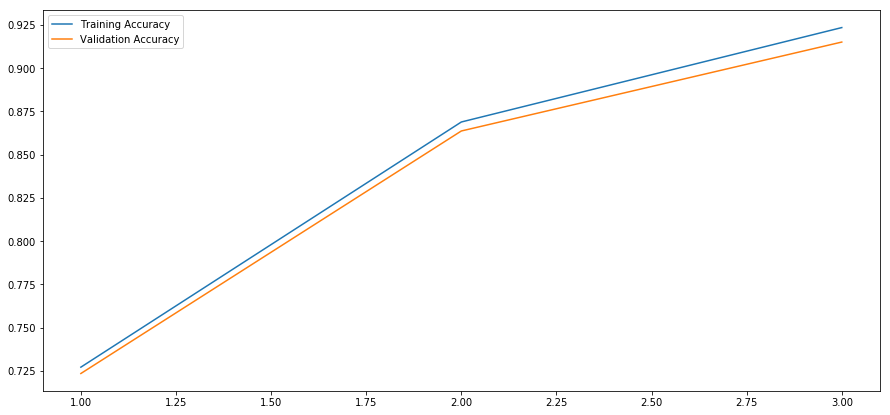

In [12]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

TRAIN_NETWORK = True

if CONVERT_TO_GRAYSCALE:
    channels = 1
else:
    channels = 3

EPOCHS = 3
BATCH_SIZE = 1024
learn_rate = 0.001

x = tf.placeholder(tf.float32, (None, 32, 32, channels))
y = tf.placeholder(tf.int32, (None))
keep_rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y,43)

logits = TrafficNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learn_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    with tf.device("/gpu:0"):
        num_examples = len(X_data)
        total_accuracy = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, BATCH_SIZE):
            batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_rate: 1.0})
            total_accuracy += (accuracy * len(batch_x))
        return (total_accuracy / num_examples)

#Train
if TRAIN_NETWORK:
    train_history = []
    validation_history = []
    epochs = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        print("Training...")
        print()
        for i in range(EPOCHS):
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_rate: 0.65})
        
            training_accuracy = evaluate(X_train, y_train)
            validation_accuracy = evaluate(X_validation, y_validation)
            epochs.append(i+1)
            train_history.append(training_accuracy)
            validation_history.append(validation_accuracy)
            print("EPOCH {} ...".format(i+1))
            print("Training Accuracy = {:.3f}".format(training_accuracy))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
        
        ops = sess.graph.get_operations()
        for op in ops:
            print(op.name)
        saver.save(sess, './traffic_net_rgb_mov')
        print("Model saved")
    
    fig = plt.figure(figsize = (15,7))
    plt.plot(epochs, train_history)
    plt.plot(epochs, validation_history)
    plt.legend(['Training Accuracy', 'Validation Accuracy'])
    plt.show()

Here we test the network on the test set:

In [13]:
#MAKE SURE TO DISABLE DROPOUT LAYERS FOR INFERENCE!!!
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./traffic_net_rgb_mov.meta')
    saver.restore(sess, "./traffic_net_rgb_mov")
    test_accuracy = evaluate(X_test, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

Test Set Accuracy = 0.880


### Freeze and Export Graph

In [ ]:
import os, argparse

import tensorflow as tf

# The original freeze_graph function
# from tensorflow.python.tools.freeze_graph import freeze_graph 

dir = os.path.dirname(os.path.realpath(__file__))

def freeze_graph(model_dir, output_node_names):
    """Extract the sub graph defined by the output nodes and convert 
    all its variables into constant 
    Args:
        model_dir: the root folder containing the checkpoint state file
        output_node_names: a string, containing all the output node's names, 
                            comma separated
    """
    if not tf.gfile.Exists(model_dir):
        raise AssertionError(
            "Export directory doesn't exists. Please specify an export "
            "directory: %s" % model_dir)

    if not output_node_names:
        print("You need to supply the name of a node to --output_node_names.")
        return -1

    # We retrieve our checkpoint fullpath
    checkpoint = tf.train.get_checkpoint_state(model_dir)
    input_checkpoint = checkpoint.model_checkpoint_path
    
    # We precise the file fullname of our freezed graph
    absolute_model_dir = "/".join(input_checkpoint.split('/')[:-1])
    output_graph = absolute_model_dir + "/frozen_model.pb"

    # We clear devices to allow TensorFlow to control on which device it will load operations
    clear_devices = True

    # We start a session using a temporary fresh Graph
    with tf.Session(graph=tf.Graph()) as sess:
        # We import the meta graph in the current default Graph
        saver = tf.train.import_meta_graph(input_checkpoint + '.meta', clear_devices=clear_devices)

        # We restore the weights
        saver.restore(sess, input_checkpoint)

        # We use a built-in TF helper to export variables to constants
        output_graph_def = tf.graph_util.convert_variables_to_constants(
            sess, # The session is used to retrieve the weights
            tf.get_default_graph().as_graph_def(), # The graph_def is used to retrieve the nodes 
            output_node_names.split(",") # The output node names are used to select the usefull nodes
        ) 

        # Finally we serialize and dump the output graph to the filesystem
        with tf.gfile.GFile(output_graph, "wb") as f:
            f.write(output_graph_def.SerializeToString())
        print("%d ops in the final graph." % len(output_graph_def.node))

    return output_graph_def

if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument("--model_dir", type=str, default="", help="Model folder to export")
    parser.add_argument("--output_node_names", type=str, default="", help="The name of the output nodes, comma separated.")
    args = parser.parse_args()

    freeze_graph(args.model_dir, args.output_node_names)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


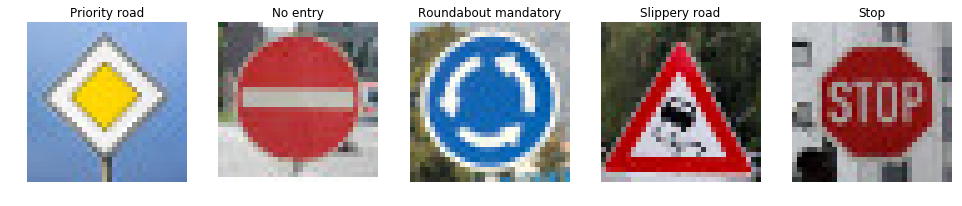

In [62]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import cv2

images = []
labels = []

img_priority = cv2.cvtColor(cv2.imread('images_32/priority_32.jpg'), cv2.COLOR_BGR2RGB)
label_priority = 12
images = np.expand_dims(img_priority, axis=0)
labels.append(label_priority)

img_no_entry = cv2.cvtColor(cv2.imread('images_32/no_entry_32.jpg'), cv2.COLOR_BGR2RGB)
print(img_no_entry.shape)
label_no_entry = 17
images = np.concatenate((images, np.expand_dims(img_no_entry, axis=0)))
labels.append(label_no_entry)

img_roundabout = cv2.cvtColor(cv2.imread('images_32/roundabout_32.jpg'), cv2.COLOR_BGR2RGB)
label_roundabout = 40
images = np.concatenate((images, np.expand_dims(img_roundabout, axis=0)))
labels.append(label_roundabout)

img_slippery = cv2.cvtColor(cv2.imread('images_32/slippery_32.jpg'), cv2.COLOR_BGR2RGB)
label_slippery = 23
images = np.concatenate((images, np.expand_dims(img_slippery, axis=0)))
labels.append(label_slippery)

img_stop = cv2.cvtColor(cv2.imread('images_32/stop_32.jpg'), cv2.COLOR_BGR2RGB)
label_stop = 14
images = np.concatenate((images, np.expand_dims(img_stop, axis=0)))
labels.append(label_stop)


#Read CSV for Image Classes
with open( './signnames.csv', 'rt') as file:
    reader = csv.reader(file)
    label_list = list(reader)    
    
#Plot 100 random images from the training set
fig1 = plt.figure(figsize = (20,8))

for i in range(1,6):
    a = fig1.add_subplot(2,6,i)
    a.set_title(label_list[labels[i-1]+1][1])
    plt.axis('off')
    image = images[i-1]
    plt.imshow(image)
    
if CONVERT_TO_GRAYSCALE:
    images_gray = np.sum(images/3, axis=3, keepdims=True)
    for i in range(1,6):
        a = fig1.add_subplot(2,6,i+6)
        a.set_title(label_list[labels[i-1]+1][1])
        plt.axis('off')
        image = images_gray[i-1].squeeze()
        plt.imshow(image, cmap='gray')
    images_norm = images_gray/255.0
else:
    images_norm = images/255.0

new_test_data = images_norm
new_labels = labels

### Predict the Sign Type for Each Image And Analyze Performance

INFO:tensorflow:Restoring parameters from ./traffic_net_rgb
Test Set Accuracy = 1.000


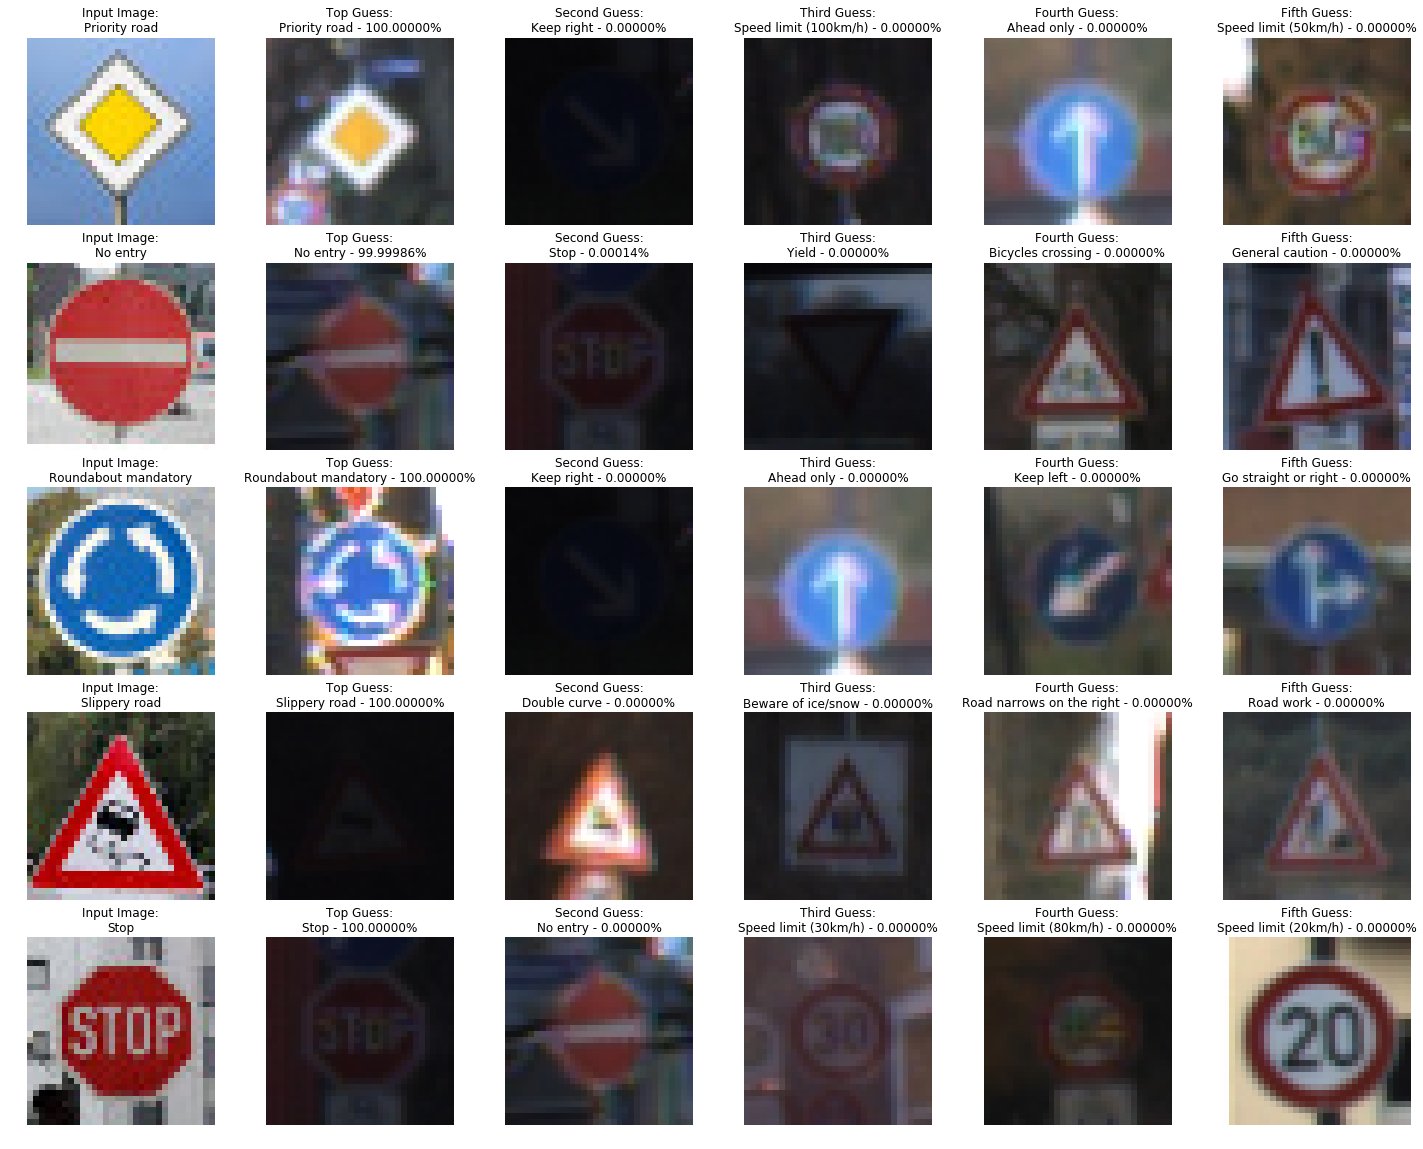

In [65]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

network_output = tf.nn.softmax(logits)
top_5 = tf.nn.top_k(network_output, k=5)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./traffic_net_rgb.meta')
    saver.restore(sess, "./traffic_net_rgb")
    test_accuracy = evaluate(new_test_data, new_labels)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))
    output_logits = sess.run(network_output, feed_dict={x: new_test_data, keep_rate: 1.0})
    output_top_5 = sess.run(top_5, feed_dict={x: new_test_data, keep_rate: 1.0})
    
    fig1 = plt.figure(figsize = (25,20))
    
    for index, image in enumerate(images):
        a = fig1.add_subplot(5,6,(index*6)+1)
        a.set_title('Input Image:\n{}'.format(label_list[labels[index]+1][1]))
        plt.axis('off')
        plt.imshow(image)
        
        a = fig1.add_subplot(5,6,(index*6)+2)
        guess_1 = output_top_5[1][index][0]
        guess_1_index = np.argwhere(train['labels'] == guess_1)[0]
        a.set_title('Top Guess:\n{} - {:.5f}%'.format(label_list[guess_1+1][1], 100*output_top_5[0][index][0]))
        plt.axis('off')
        plt.imshow(train['features'][guess_1_index].squeeze())
        
        a = fig1.add_subplot(5,6,(index*6)+3)
        guess_2 = output_top_5[1][index][1]
        guess_2_index = np.argwhere(train['labels'] == guess_2)[0]
        a.set_title('Second Guess:\n{} - {:.5f}%'.format(label_list[guess_2+1][1], 100*output_top_5[0][index][1]))
        plt.axis('off')
        plt.imshow(train['features'][guess_2_index].squeeze())
        
        a = fig1.add_subplot(5,6,(index*6)+4)
        guess_3 = output_top_5[1][index][2]
        guess_3_index = np.argwhere(train['labels'] == guess_3)[0]
        a.set_title('Third Guess:\n{} - {:.5f}%'.format(label_list[guess_3+1][1], 100*output_top_5[0][index][2]))
        plt.axis('off')
        plt.imshow(train['features'][guess_3_index].squeeze())
    
        a = fig1.add_subplot(5,6,(index*6)+5)
        guess_4 = output_top_5[1][index][3]
        guess_4_index = np.argwhere(train['labels'] == guess_4)[0]
        a.set_title('Fourth Guess:\n{} - {:.5f}%'.format(label_list[guess_4+1][1], 100*output_top_5[0][index][2]))
        plt.axis('off')
        plt.imshow(train['features'][guess_4_index].squeeze())

        a = fig1.add_subplot(5,6,(index*6)+6)
        guess_5 = output_top_5[1][index][4]
        guess_5_index = np.argwhere(train['labels'] == guess_5)[0]
        a.set_title('Fifth Guess:\n{} - {:.5f}%'.format(label_list[guess_5+1][1], 100*output_top_5[0][index][2]))
        plt.axis('off')
        plt.imshow(train['features'][guess_5_index].squeeze())
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.